In [1]:
import pandas as pd
import numpy as np

In [2]:
class MARCS_model():
    def __init__(self, file):
        self. lines = file.readlines()
        self.data = {}
    def general_info(self):
    #read general info and stores them in a dictionary
            i = 0
            
            lines = self.lines
            
            for line in lines:
                
                words = line.strip().split(' ')
                i+=1
                for j in range(0,len(words)):
                    #if words[j].isalpha():
                        
                        if words[j] == 'TEFF=':
                            print('1')
                            self.data['TEFF'] = float(words[j+1])

                        if words[j] == 'G=':
                            print('2')
                            self.data['LOGG'] = float(words[j+2])

                        if words[j] == 'SIGMA*TEFF**4)':
                            print('3')
                            self.data['Total Flux'] = float(words[j+2])

                        if words[j] == 'C/O':
                            
                            word = words[j+3]
                            
                            self.data['C/O'] = float(word)
                        if words[j] == 'GRAVITY':
                            x=(words[j+5])
                            print('5')
                            self.data['acceleration of gravity'] = float(x)
                        if len(words)>2:
                            if words[1] == 'NORMAL' or words[2]=='END':

                                print('file ended')
                            

            return self.data

    def thermo(self):
        #reads 'Correction from last iteration', 
        #'Model atmosphere' and ' Thermodynamical quantities and convectionCGS UNITS)'
        
        lines = self.lines
       
        constrain = 0
        df_list = list()
        obs_list = list()
        
        counter = 0
        # Strips the newline character
        
        for line in lines:
            
            my_string= line.strip().split(' ')
            if len(my_string)== 45 and my_string[0] == 'I' and my_string[1] == 'O' :
        
                print('all the layers-related info has been stored')
                break
            if constrain == 0:
                if my_string[0] == 'K':
                    col_names = list()
                    
                    for elm in my_string:
                        
                        if len(elm) >0 and elm !='GEOM.' and elm != 'VEL.':
                            
                            col_names.append(elm)
                    constrain = 1
                    if (col_names[-1])!='K' and len(col_names)!=23 and len(col_names)!=53:
                        col_names.append('K')
                   
                else:
                    continue
                   
            else:
                if len(my_string) > 1 and my_string[1]!='MOLECULES(/+ATOMS)' and my_string[0]!='I':
                    obs_row = list()
                    for row in my_string:
                        if len(row) >0 :
                            
                            obs_row.append(float(row))
                    
                    obs_list.append(obs_row)
                    
                else:
                    #print(obs_list, col_names,'\n\n')
                    df_list.append(pd.DataFrame(obs_list, columns = col_names))
                    obs_list=list()
                    col_names=list()
                    constrain = 0
            counter +=1
        
        return df_list  
    
    
                    
    def opacity(self):
        
        lines = self.lines
       
        constrain = 0
        df_list = {}
        #df_list = list()
        obs_list = list()
        layer = {}
        counter = 0
        
        # Strips the newline character
        
        for line in lines:
            
            my_string= line.strip().split(' ')
            
            print(my_string)
            if constrain == 0:
                
                if  len(my_string)>1 and my_string[1]=='TAU=':
                    if my_string[3]!='*':
                        layer['tau'] = my_string[3]
                    
                if len(my_string)>1 and my_string[0]=='T=':
                    
                    layer['T'] = my_string[2]
                    layer['Pe'] = my_string[5]
                    
                    
                if my_string[0] == 'WAVELENGTH':
                    col_names = list()
                    for elm in my_string:
                        #SCAT     H-    H BF  (H+H) H2+   H2-   C I   MG I  AL I  SI I  HE I  HE-   H2PR  HEPR  ELSC  H-SC  H2SC 
                        if len(elm) >0:
                            
                            if elm == 'H':
                                
                                col_names.append('H BF')
                                continue
                            if elm == 'C':
                                col_names.append('CI')
                                continue
                            if elm == 'MG':
                                col_names.append('MGI')
                                continue
                            if elm == 'AL':
                                col_names.append('ALI')
                                continue
                            if elm == 'SI':
                                col_names.append('SII')
                                continue
                            if elm == 'HE':
                                col_names.append('HEI')
                                continue
                            if elm == 'BF' or elm =='I':
                                continue
                            else:
                                
                                col_names.append(elm)
                            # C I   MG I  AL I  SI I  HE I
                                                
                    constrain = 1
                    counter+=1
                    print(counter)
                       
                else:
                    continue
                   
            else:
                
                if len(my_string) > 1 and my_string[2]!='BELL\'S':
                    
                    obs_row = list()
                    
                    for row in my_string:
                        if len(row) >0 :
                            
                            obs_row.append(float(row))
                    
                    obs_list.append(obs_row)
                   
                else:
                    df_list[layer['tau']] = layer
                    df_list[counter] = pd.DataFrame(obs_list, columns = col_names)
                    
                    #print(df_list[counter], '\n\n')
                    #df_list.append(pd.DataFrame(obs_list, columns = col_names))
                    obs_list=list()
                    col_names=list()
                   
                    constrain = 0
           
        print('opacities saved')
        return df_list  
    
    def fluxes(self):
        
        lines = self.lines
       
        constrain = 0
        df_list = {}
        obs_list = list()
        layer = {}
        counter = 0
        fluxes = [] 
        
        for line in lines:
            
            my_string= line.strip().split(' ')
                        
            if my_string[0] == 'F' and my_string[1] == 'L' and my_string[2] == 'U' and my_string[3] == 'X':
                constrain = 1
            if my_string[0] == 'G' and my_string[1] == 'I' and my_string[2] == 'A' and my_string[3] == 'N':
                constrain = 0
            if len(my_string)>1 and constrain == 1:
                fluxes.append(my_string)
                print(my_string,'\n')
        #for x in fluxes:
        #    if x.
                    
                    
        

In [3]:
file = open('t30g45K3339pe2mol22.dat', 'r')
x = MARCS_model(file)
df = x.thermo()
x.fluxes()

all the layers-related info has been stored
['F', 'L', 'U', 'X', 'E', 'S', '(PHYSICAL', 'FLUXES', 'IN', 'ERGS/S/CM**2/ANGSTROM)'] 

['LAMBDA', '', '', '', '', 'FLUX', '', '', '', '', '', '', 'MAGN', '', '', '', '', '', 'LAMBDA', '', '', '', '', 'FLUX', '', '', '', '', '', '', 'MAGN', '', '', '', '', '', 'LAMBDA', '', '', '', '', 'FLUX', '', '', '', '', '', '', 'MAGN', '', '', '', '', '', 'LAMBDA', '', '', '', '', 'FLUX', '', '', '', '', '', '', 'MAGN'] 

['814.', '', '', '6.38E-16', '', '', '', '1.334', '', '', '', '', '', '', '5250.', '', '', '2.49E-15', '', '', '-0.145', '', '', '', '', '243057.', '', '', '9.51E-15', '', '', '-1.598'] 

['866.', '', '', '6.52E-16', '', '', '', '1.311', '', '', '', '', '', '', '5350.', '', '', '1.96E-15', '', '', '', '0.116', '', '', '', '', '260415.', '', '', '9.80E-15', '', '', '-1.631'] 

['934.', '', '', '7.02E-16', '', '', '', '1.230', '', '', '', '', '', '', '5450.', '', '', '2.65E-15', '', '', '-0.211', '', '', '', '', '299501.', '', '', '9.72E

In [4]:
T = df[1]['T']
P = df[1]['PG']

In [5]:
import matplotlib.pyplot as plt

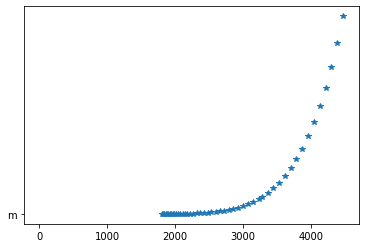

In [6]:
plt.plot(T,P,'*','m')   

t20g45K.dat 

all the layers-related info has been stored
t20_g45_irrad_60_1AU.dat 

all the layers-related info has been stored


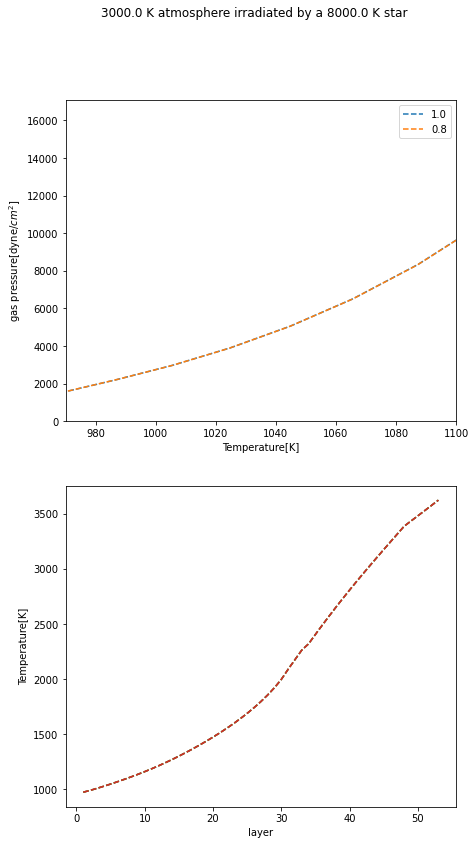

In [27]:
#filenames = ['t30g45_irrad_80.dat','t30g45_irrad_80_08AU.dat','t30g45_irrad_80_06AU.dat','t30g45K.dat']#'t30g45K3339pe2mol22_irrad.dat', '3k_irrad_on.dat']
filenames = ['t20g45K.dat', 't20_g45_irrad_60_1AU.dat']
Rau = [1.0,0.8,0.6,'no irrad']
Teff = 3000.0
STeff = 8000.0
fig = plt.figure(figsize=(7, 13))

ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
ax0.set_xlabel('Temperature[K]')
ax0.set_ylabel('gas pressure[dyne/$cm^2$]')
ax1.set_xlabel('layer')
ax1.set_ylabel('Temperature[K]')

fig.suptitle('{} K atmosphere irradiated by a {} K star'.format(Teff, STeff))
i=0

for name, r in zip(filenames, Rau):
    print(name, '\n')
    i = i+1
    word = name.split('_')

        
    file = open(name, 'r')
    x = MARCS_model(file)
    df = x.thermo()
    
    T = df[1]['T']
    P = df[1]['PG']
    k = df[1]['K']
    
    ax0.plot(T,P,'--', label = r)
    ax1.plot(k,T,'--', label = r)
ax0.set_ylim(-5, 17077.0)
ax0.set_xlim(970.0,1100)
#ax1.set_xlim(1,20)
#ax1.set_ylim(1875.0,2100.0)
ax0.legend()
fig.savefig('planet_20_star_60.jpg')
#ax1.legend()
    

In [26]:
P

0         1603.6
1         2215.5
2         2960.6
3         3886.4
4         5044.4
5         6497.3
6         8321.6
7        10611.0
8        13482.0
9        17077.0
10       21567.0
11       27158.0
12       34091.0
13       42654.0
14       53189.0
15       66103.0
16       81881.0
17      101110.0
18      124520.0
19      152980.0
20      187540.0
21      229470.0
22      280290.0
23      341830.0
24      416240.0
25      506050.0
26      614240.0
27      744180.0
28      899660.0
29     1084400.0
30     1299600.0
31     1549900.0
32     1845200.0
33     2071500.0
34     2462900.0
35     2926300.0
36     3474300.0
37     4121000.0
38     4882100.0
39     5775900.0
40     6822800.0
41     8046400.0
42     9473800.0
43    11136000.0
44    13067000.0
45    15307000.0
46    17903000.0
47    20906000.0
48    23164000.0
49    25650000.0
50    28386000.0
51    31395000.0
52    34706000.0
Name: PG, dtype: float64